<a href="https://colab.research.google.com/github/VenGr0/IMDB/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence

# Загрузка данных
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Преобразование последовательностей в двумерные матрицы
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Создание модели
embedding_vector_length = 64  # Увеличиваем размер векторов вложения
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # Добавляем dropout для предотвращения переобучения
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)  # Увеличиваем количество эпох

# Оценка модели
scores = model.evaluate(X_test, y_test, verbose=0)
print("Точность на тестовых данных: %.2f%%" % (scores[1]*100))

Epoch 1/5
98/98 [==============================] - 438s 4s/step - loss: 0.5242 - accuracy: 0.7350 - val_loss: 0.4650 - val_accuracy: 0.7833
Epoch 2/5
98/98 [==============================] - 430s 4s/step - loss: 0.3964 - accuracy: 0.8238 - val_loss: 0.3056 - val_accuracy: 0.8755
Epoch 3/5
98/98 [==============================] - 438s 4s/step - loss: 0.2502 - accuracy: 0.9006 - val_loss: 0.2892 - val_accuracy: 0.8779
Epoch 4/5
98/98 [==============================] - 432s 4s/step - loss: 0.2204 - accuracy: 0.9147 - val_loss: 0.3101 - val_accuracy: 0.8773
Epoch 5/5
98/98 [==============================] - 434s 4s/step - loss: 0.1949 - accuracy: 0.9259 - val_loss: 0.3000 - val_accuracy: 0.8775
Точность на тестовых данных: 87.75%


При выполнении кода видно,что точность модели 92,6%, валидационная выборка 87,75%. Цели достигнуты.

Задача о Титанике

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/titanic.zip

# Распаковываем датасет
!unzip -o -q titanic.zip -d titanic

import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
%matplotlib inline

# Создаём DataFrame из датасетов

# Для тренировочного набора
df_train = pd.read_csv(
    "./titanic/train.csv")

# Для контрольного набора
df_test = pd.read_csv(
    "./titanic/test.csv")

# Объединим датасеты, так как нам их всеравно приводить к одной форме
df = pd.concat([df_train, df_test], ignore_index=True, sort = False)

--2024-05-03 12:33:35--  https://storage.yandexcloud.net/academy.ai/titanic.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34877 (34K) [application/zip]
Saving to: ‘titanic.zip’

titanic.zip         100%[===================>]  34.06K  --.-KB/s    in 0.05s   

2024-05-03 12:33:35 (747 KB/s) - ‘titanic.zip’ saved [34877/34877]



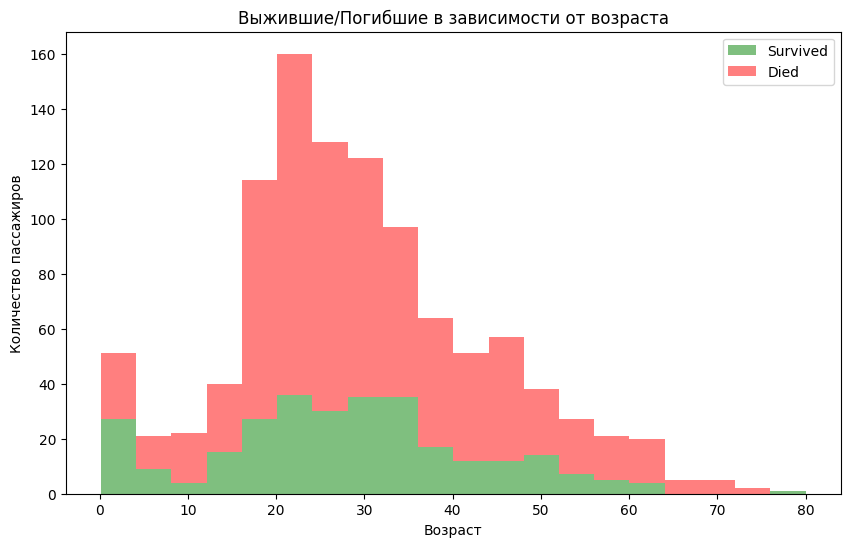

In [ ]:
import matplotlib.pyplot as plt

# Создаём столбец Survived, заполненный нулями для контрольного набора
df_test['Survived'] = 0

# Объединим датасеты для построения графика
df_full = pd.concat([df_train, df_test], ignore_index=True, sort = False)

# Создаём график выживших и погибших в зависимости от возраста
plt.figure(figsize=(10, 6))
plt.hist([df_full[df_full['Survived'] == 1]['Age'].dropna(),
         df_full[df_full['Survived'] == 0]['Age'].dropna()],
         bins=20, stacked=True, color=['g', 'r'], alpha=0.5,
         label=['Survived', 'Died'])
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.title('Выжившие/Погибшие в зависимости от возраста')
plt.show()

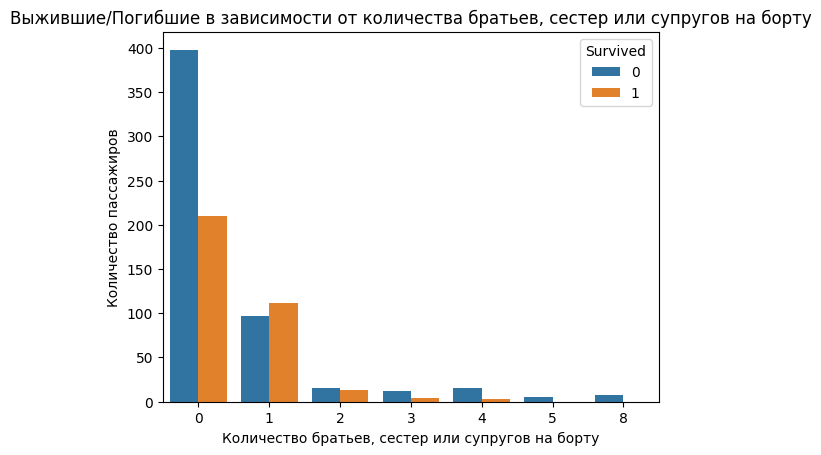

In [ ]:
import seaborn as sns

# Создаём график количества выживших и погибших в зависимости от количества братьев, сестер или супругов (SibSp)
sns.countplot(x='SibSp', hue='Survived', data=df_train)
plt.xlabel('Количество братьев, сестер или супругов на борту')
plt.ylabel('Количество пассажиров')
plt.title('Выжившие/Погибшие в зависимости от количества братьев, сестер или супругов на борту')
plt.show()

Анализ "увеличенной модели"

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Получение словаря
word_index = imdb.get_word_index()

# Инвертируем словарь, меняем местами ключ и значение
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Декодируем с помощью словаря первый элемент обучающей выборки
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

EPOCHS = 15
BATCH_SIZE = 128
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

1641221/1641221 [==============================] - 1s 0us/step
Epoch 1/15
176/176 [==============================] - 3s 13ms/step - loss: 0.3865 - accuracy: 0.8408 - val_loss: 0.2785 - val_accuracy: 0.8920
Epoch 2/15
176/176 [==============================] - 3s 15ms/step - loss: 0.2002 - accuracy: 0.9275 - val_loss: 0.2829 - val_accuracy: 0.8956
Epoch 3/15
176/176 [==============================] - 2s 13ms/step - loss: 0.1440 - accuracy: 0.9487 - val_loss: 0.3180 - val_accuracy: 0.8832
Epoch 4/15
176/176 [==============================] - 2s 11ms/step - loss: 0.1085 - accuracy: 0.9623 - val_loss: 0.3764 - val_accuracy: 0.8824
Epoch 5/15
176/176 [==============================] - 2s 10ms/step - loss: 0.0846 - accuracy: 0.9719 - val_loss: 0.4355 - val_accuracy: 0.8764
Epoch 6/15
176/176 [==============================] - 2s 10ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.4896 - val_accuracy: 0.8724
Epoch 7/15
176/176 [==============================] - 2s 10ms/step - loss: 0.04

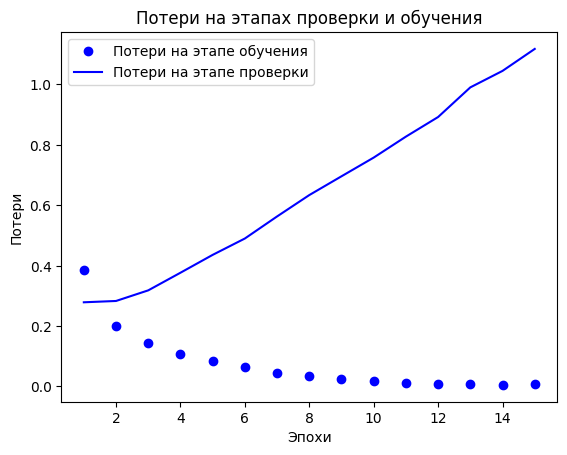

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Epoch 1/15
176/176 [==============================] - 3s 11ms/step - loss: 0.4295 - accuracy: 0.8315 - val_loss: 0.2981 - val_accuracy: 0.8888
Epoch 2/15
176/176 [==============================] - 2s 9ms/step - loss: 0.2320 - accuracy: 0.9176 - val_loss: 0.2740 - val_accuracy: 0.8968
Epoch 3/15
176/176 [==============================] - 2s 9ms/step - loss: 0.1748 - accuracy: 0.9394 - val_loss: 0.2771 - val_accuracy: 0.8960
Epoch 4/15
176/176 [==============================] - 2s 10ms/step - loss: 0.1407 - accuracy: 0.9513 - val_loss: 0.2963 - val_accuracy: 0.8900
Epoch 5/15
176/176 [==============================] - 2s 12ms/step - loss: 0.1138 - accuracy: 0.9637 - val_loss: 0.3217 - val_accuracy: 0.8900
Epoch 6/15
176/176 [==============================] - 2s 9ms/step - loss: 0.0905 - accuracy: 0.9725 - val_loss: 0.3561 - val_accuracy: 0.8816
Epoch 7/15
176/176 [==============================] - 2s 9ms/step - loss: 0.0712 - accuracy: 0.9795 - val_loss: 0.3956 - val_accuracy: 0.8784
Epo

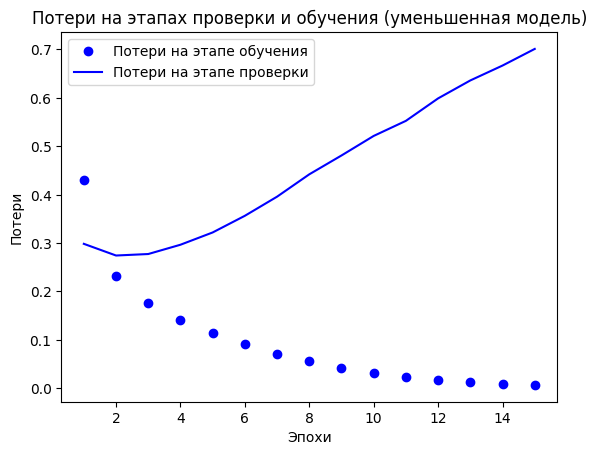

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения (уменьшенная модель)')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Epoch 1/15
176/176 [==============================] - 4s 15ms/step - loss: 0.3642 - accuracy: 0.8507 - val_loss: 0.2910 - val_accuracy: 0.8868
Epoch 2/15
176/176 [==============================] - 2s 13ms/step - loss: 0.1907 - accuracy: 0.9270 - val_loss: 0.2975 - val_accuracy: 0.8900
Epoch 3/15
176/176 [==============================] - 2s 14ms/step - loss: 0.1348 - accuracy: 0.9523 - val_loss: 0.3407 - val_accuracy: 0.8828
Epoch 4/15
176/176 [==============================] - 2s 12ms/step - loss: 0.0948 - accuracy: 0.9684 - val_loss: 0.4057 - val_accuracy: 0.8768
Epoch 5/15
176/176 [==============================] - 2s 14ms/step - loss: 0.0651 - accuracy: 0.9792 - val_loss: 0.4592 - val_accuracy: 0.8740
Epoch 6/15
176/176 [==============================] - 2s 11ms/step - loss: 0.0389 - accuracy: 0.9898 - val_loss: 0.5182 - val_accuracy: 0.8720
Epoch 7/15
176/176 [==============================] - 2s 10ms/step - loss: 0.0218 - accuracy: 0.9964 - val_loss: 0.5813 - val_accuracy: 0.8684

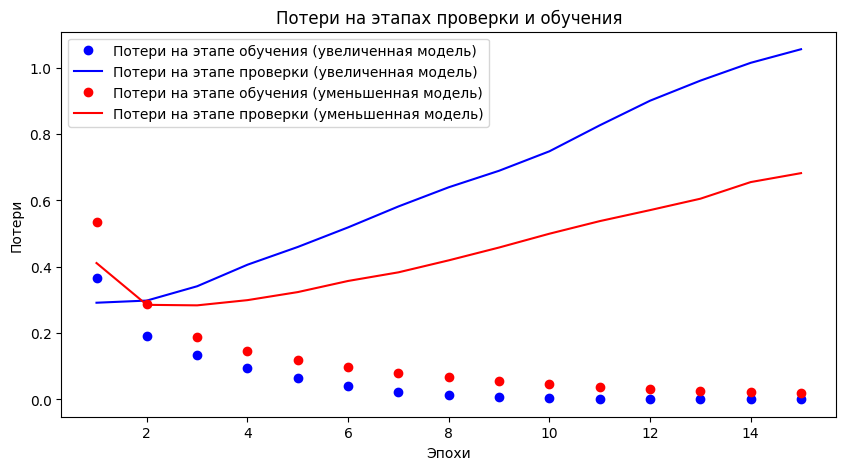

In [ ]:
# Создаем первую (увеличенную) модель
model_large = models.Sequential()
model_large.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_large.add(layers.Dense(16, activation='relu'))
model_large.add(layers.Dense(1, activation='sigmoid'))
model_large.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_large = model_large.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

# Создаем вторую (уменьшенную) модель
model_small = models.Sequential()
model_small.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model_small.add(layers.Dense(4, activation='relu'))
model_small.add(layers.Dense(1, activation='sigmoid'))
model_small.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_small = model_small.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

plt.figure(figsize=(10, 5))

epochs = range(1, EPOCHS + 1)

plt.plot(epochs, history_large.history['loss'], 'bo', label='Потери на этапе обучения (увеличенная модель)')
plt.plot(epochs, history_large.history['val_loss'], 'b', label='Потери на этапе проверки (увеличенная модель)')
plt.plot(epochs, history_small.history['loss'], 'ro', label='Потери на этапе обучения (уменьшенная модель)')
plt.plot(epochs, history_small.history['val_loss'], 'r', label='Потери на этапе проверки (уменьшенная модель)')

plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Делаем вывод, что  увеличенная модель более подвержена переобучению, но имеет лучшие показатели во время обучения